In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h1>We are going to use another automobile dataset and look at how certain features affect price</h1>

In [2]:
df = pd.read_csv("automobileEDA.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

In [4]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ h_mpg')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [5]:
x = df['highway-mpg']
y = df['price']

In [6]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


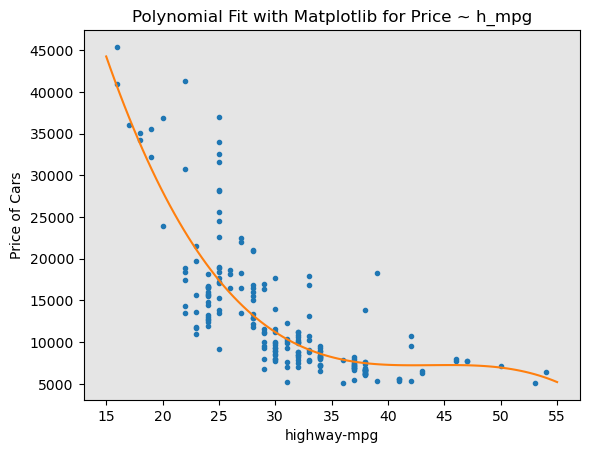

In [7]:
PlotPolly(p, x, y, 'highway-mpg')

In [8]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<h2>Let's look at an 11th order model</h2>

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


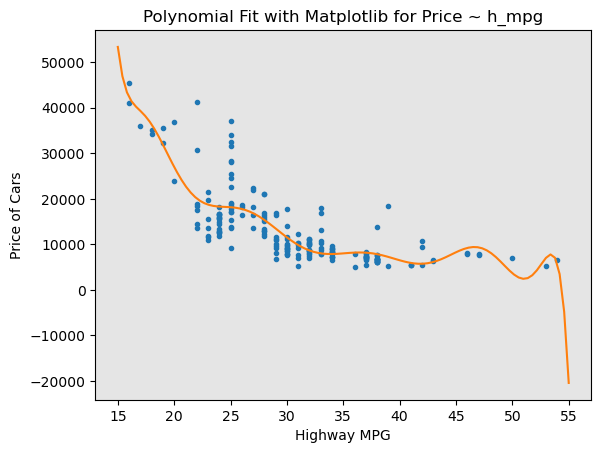

In [9]:
# Here we use a polynomial of the 11rd order 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [12]:
pr=PolynomialFeatures(degree=2)

In [13]:
Z_pr=pr.fit_transform(Z)

In [14]:
Z.shape

(201, 4)

In [15]:
#note that the transformed object has 15 features vs the original 4
Z_pr.shape

(201, 15)

<h1>Pipeline</h1>
<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [32]:
#Note: the original notebook sent out did not include "degree=2" in the PolynomialFeatures constructor
#This worked identically to the code below, becasue the default value specified for that constructor IS 2
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model',LinearRegression())]

In [33]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [34]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [35]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h2>Let's calculate the R-squared score for these results</h2>

In [21]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, ypipe)
print('The R-square value is: ', r_squared)

The R-square value is:  0.8463341969864728


<h2>Let's do an ~80% / 20% train/test split and see how the model works as a predictor</h2>

In [22]:
#there are multiple ways to do this, I am copying all of 
#the features of interest(including target) to one dataframe first
Z2 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'price']]
#I'm making sure all of the features are cast as floats
Z2 = Z2.astype(float)
msk = np.random.rand(len(Z2)) < 0.8
#then creating separate test and train dataframes
train = Z2[msk]
test = Z2[~msk]

In [23]:
train.shape

(163, 5)

In [24]:
test.shape

(38, 5)

In [25]:
# I am now splitting the predictors from the target
train_x = train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
train_y = train['price']
test_x = test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
test_y = test['price']

In [26]:
pipe.fit(train_x,train_y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [27]:
y_hat = pipe.predict(test_x)

In [28]:
r_squared = r2_score(test_y, y_hat)
print('The R-square value is: ', r_squared)

The R-square value is:  0.7908126315329965
